<a href="https://colab.research.google.com/github/vladijarosz/Mercado-de-Valores/blob/main/graficos_tenencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
!wget -tenencias_2.xlsx "https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/tenencias_2.xlsx"

import pandas as pd
df = pd.read_excel("tenencias_2.xlsx")


--2025-12-03 23:27:58--  https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/tenencias_2.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/tenencias_2.xlsx [following]
--2025-12-03 23:27:59--  https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/tenencias_2.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32448 (32K) [application/octet-stream]
Saving to: ‘tenencias_2.xlsx.2’

tenencias_2.xlsx.2  100%[===================>]  31.69K  --.-KB/s    in 0.01s   

2025-12-03 23:27:59 (2

In [39]:
import pandas as pd
import re

# Asumiendo que ya cargaste tu DataFrame como 'df'
# Por ejemplo si lo cargaste desde un Excel:
# df = pd.read_excel('tu_archivo.xlsx')

# Función para extraer y completar la columna Ticker
def completar_ticker(nombre):
    match = re.search(r'\((\w+)\)', str(nombre))
    if not match:
        return None
    ticker = match.group(1)
    if 'CEDEAR' in str(nombre):
        return f"{ticker}.BA"
    else:
        return ticker

# Aplicar la función solo donde esté vacío el Ticker
df['Ticker'] = df.apply(
    lambda row: completar_ticker(row['Nombre']) if pd.isna(row['Ticker']) else row['Ticker'],
    axis=1
)

# Mostrar los primeros resultados
df


,fecha,Ticker,Nombre,Tenencia,precio,moneda,total
0,2024-01-31,BPAT,BANCO PATAGONIA ACCIONES CL. B $ ESC. (BPAT),571,"53,35",ARS,30460.57
1,2024-01-31,BRKB.BA,CEDEAR BERKSHIRE HATHAWAY INC. (BRKB),19,"22489,5",ARS,427300.50
2,2024-01-31,AGRO,AGROMETAL S.A.I. ESCR. 1 VOTO (AGRO),13171,"61,3",ARS,807382.30
3,2024-01-31,HARG,HOLCIM ESCRIT. ORD. 1 VOTO (HARG),953,895,ARS,852935.00
4,2024-01-31,XLE.BA,CEDEAR ENERGY SELECT SECTOR SPDR FUND (XLE),16,53500,ARS,856000.00
...,...,...,...,...,...,...,...
274,2024-12-31,AL30,BONO REP. ARGENTINA USD STEP UP 2030 (AL30),57390,88050,ARS,50531895.00
275,2024-12-31,COCOAUSD,FCI COCOS AHORRO CL.A U$S ESC. (COCOAUSD),4,1170,USD,4680.00
276,2024-12-31,None,ARS,"-6112,92",1,ARS,-6112.92
277,2024-12-31,None,EXT,"5,19",1,EXT,5.19


In [40]:
# Reemplazar comas por puntos y convertir 'precio' y 'Tenencia' a float
df['precio'] = df['precio'].astype(str).str.replace(',', '.', regex=False)
df['precio'] = pd.to_numeric(df['precio'], errors='coerce')

df['Tenencia'] = pd.to_numeric(df['Tenencia'], errors='coerce')
import pandas as pd

# Supongamos que ya tenés el DataFrame cargado como `df`

# Convertir columnas necesarias
df['fecha'] = pd.to_datetime(df['fecha'])  # asegurar que fecha es tipo datetime
df['total'] = df['total'].astype(str).str.replace(',', '.').astype(float)  # convertir total a float

# Agrupar por fecha y sumar
suma_por_fecha = df.groupby('fecha')['total'].sum().reset_index()

# Mostrar resultado
print(suma_por_fecha)


        fecha         total
0  2024-01-31  6.604867e+07
1  2024-02-28  7.040290e+07
2  2024-03-31  9.956208e+07
3  2024-04-30  1.202633e+08
4  2024-05-31  1.299477e+08
5  2024-06-30  1.470379e+08
6  2024-07-31  1.843865e+08
7  2024-08-30  2.199457e+08
8  2024-09-30  2.178788e+08
9  2024-10-31  2.173157e+08
10 2024-11-30  2.568174e+08
11 2024-12-31  2.246312e+08


In [41]:
!wget -O MEP.csv "https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/main/datos/MEP.csv"

import pandas as pd
df_mep = pd.read_csv("MEP.csv")



--2025-12-03 23:27:59--  https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/main/datos/MEP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149475 (146K) [text/plain]
Saving to: ‘MEP.csv’

MEP.csv             100%[===================>] 145.97K  --.-KB/s    in 0.07s   

2025-12-03 23:28:00 (1.91 MB/s) - ‘MEP.csv’ saved [149475/149475]



In [42]:
# Asegurarse de que ambas columnas fecha sean datetime
df['fecha'] = pd.to_datetime(df['fecha'])
df_mep['fecha'] = pd.to_datetime(df_mep['fecha'])

# Unir por fecha (left join para mantener todas las filas de df)
df = pd.merge(df, df_mep[['fecha', 'ultimo']], on='fecha', how='left')

# Crear columna total_usd
df['total_usd'] = df['total'] / df['ultimo']

In [43]:
# Asegurar tipos y orden
df_mep['fecha'] = pd.to_datetime(df_mep['fecha'])
df_mep['mep'] = pd.to_numeric(df_mep['ultimo'], errors='coerce')
df_mep.sort_values('fecha', inplace=True)

suma_por_fecha['fecha'] = pd.to_datetime(suma_por_fecha['fecha'])
suma_por_fecha.sort_values('fecha', inplace=True)

# Merge asof para encontrar el valor MEP más cercano previo o igual
suma_con_mep = pd.merge_asof(suma_por_fecha, df_mep[['fecha', 'mep']], on='fecha', direction='backward')

# Calcular el total en USD
suma_con_mep['total_usd'] = suma_con_mep['total'] / suma_con_mep['mep']

# Resultado
print(suma_con_mep[['fecha', 'total', 'mep', 'total_usd']])


        fecha         total      mep      total_usd
0  2024-01-31  6.604867e+07  1175.67   56179.600100
1  2024-02-28  7.040290e+07  1031.25   68269.478691
2  2024-03-31  9.956208e+07  1016.09   97985.493765
3  2024-04-30  1.202633e+08  1040.89  115538.948458
4  2024-05-31  1.299477e+08  1215.93  106871.076509
5  2024-06-30  1.470379e+08  1347.96  109081.773799
6  2024-07-31  1.843865e+08  1293.33  142567.275212
7  2024-08-30  2.199457e+08  1279.96  171837.943537
8  2024-09-30  2.178788e+08  1215.03  179319.727834
9  2024-10-31  2.173157e+08  1131.46  192066.622010
10 2024-11-30  2.568174e+08  1075.76  238731.088477
11 2024-12-31  2.246312e+08  1170.41  191925.220888


In [44]:
!wget -O depositos.xlsx "https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/depositos.xlsx"

import pandas as pd
depositos = pd.read_excel("depositos.xlsx")



--2025-12-03 23:28:00--  https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/depositos.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/depositos.xlsx [following]
--2025-12-03 23:28:00--  https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/depositos.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9943 (9.7K) [application/octet-stream]
Saving to: ‘depositos.xlsx’

depositos.xlsx      100%[===================>]   9.71K  --.-KB/s    in 0.001s  

2025-12-03 23:28:01 (9.98 MB/s) 

In [45]:
import pandas as pd

# Asegurar que fecha es datetime
depositos['fecha'] = pd.to_datetime(depositos['fecha'])

# Crear rango completo de meses (de primer a último mes con datos)
rango_meses = pd.date_range(
    start=depositos['fecha'].min().to_period('M').to_timestamp('M'),
    end=depositos['fecha'].max().to_period('M').to_timestamp('M'),
    freq='M'
)

# Agrupar por fin de mes y sumar importes
depositos_mensual = (
    depositos
    .groupby(depositos['fecha'].dt.to_period('M').dt.to_timestamp('M'))['importe usd']
    .sum()
    .sort_index()
    .cumsum()
    .reindex(rango_meses)  # Rellenar todos los meses
    .ffill()  # Si no hubo nuevos depósitos, repetir el acumulado anterior
    .fillna(0)  # Si el primer valor es NaN, lo ponemos en 0
    .reset_index()
)

# Renombrar columnas
depositos_mensual.columns = ['fecha', 'deposito_acumulado_usd']

# Mostrar resultado
print(depositos_mensual)



        fecha  deposito_acumulado_usd
0  2024-01-31            53807.453451
1  2024-02-29            59337.407368
2  2024-03-31            88631.617753
3  2024-04-30           105351.007635
4  2024-05-31           105351.007635
5  2024-06-30           112800.443032
6  2024-07-31           129485.829133
7  2024-08-31           142819.284401
8  2024-09-30           142819.284401
9  2024-10-31           135768.440166
10 2024-11-30           146294.755955
11 2024-12-31            98409.207028


/tmp/ipython-input-620622103.py:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



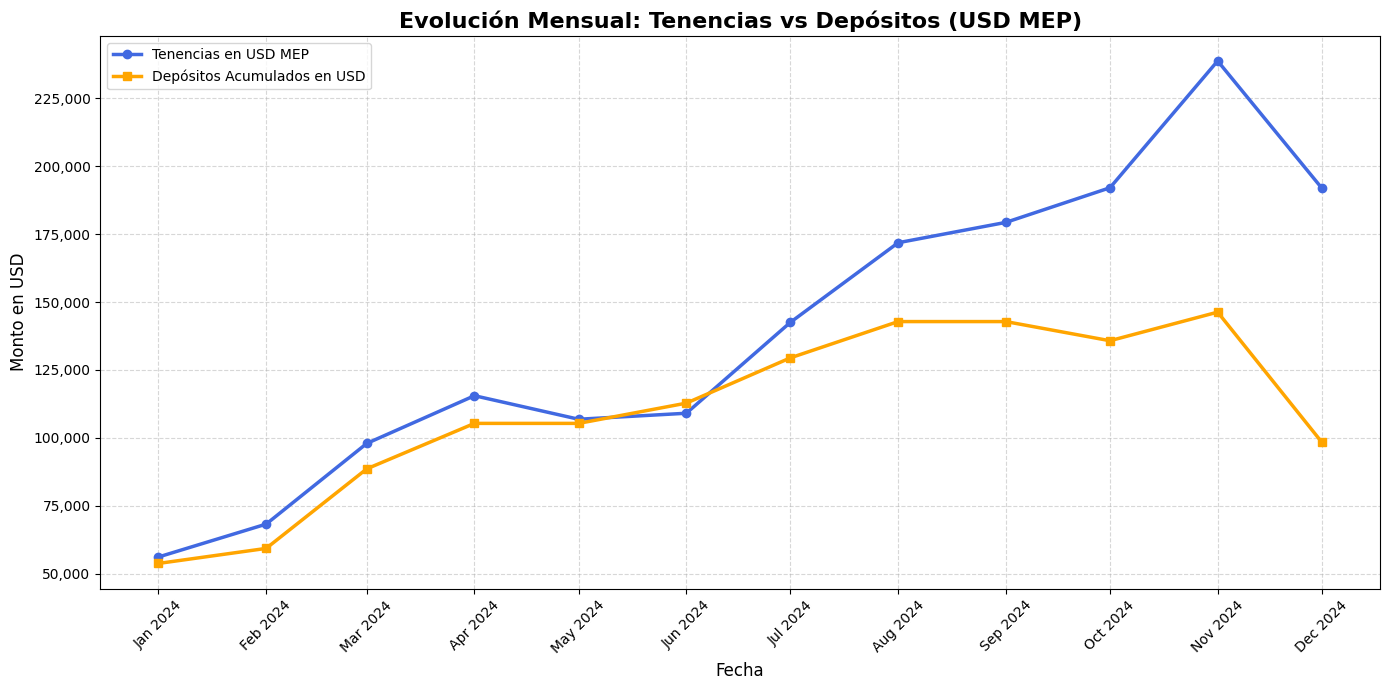

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

# Convertir fechas a inicio de mes
suma_con_mep['fecha'] = pd.to_datetime(suma_con_mep['fecha']).dt.to_period('M').dt.to_timestamp()
depositos_mensual['fecha'] = pd.to_datetime(depositos_mensual['fecha']).dt.to_period('M').dt.to_timestamp()

# Merge outer para no perder valores
df_merged = pd.merge(suma_con_mep, depositos_mensual, on='fecha', how='outer').sort_values('fecha')

df_tenencias=df_merged

# Graficar
plt.figure(figsize=(14, 7))
plt.plot(df_merged['fecha'], df_merged['total_usd'], label='Tenencias en USD MEP',
         color='royalblue', linewidth=2.5, marker='o')
plt.plot(df_merged['fecha'], df_merged['deposito_acumulado_usd'], label='Depósitos Acumulados en USD',
         color='orange', linewidth=2.5, marker='s')


# Estética del gráfico
plt.title('Evolución Mensual: Tenencias vs Depósitos (USD MEP)', fontsize=16, weight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Monto en USD', fontsize=12)

# Formato del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

# Formato del eje Y
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()



In [47]:
# Calcular variaciones mensuales
df_merged['variacion_tenencias'] = df_merged['total_usd'].diff()
df_merged['variacion_depositos'] = df_merged['deposito_acumulado_usd'].diff()
df_merged['Var_tenencias']=df_merged['variacion_tenencias']/df_merged['total_usd'].shift(1)
df_merged['Var_depositos']=df_merged['variacion_depositos']/df_merged['deposito_acumulado_usd'].shift(1)

# Acumulado de las variaciones mensuales
df_merged['variacion_tenencias_acumulada'] = df_merged['Var_tenencias'].cumsum()
df_merged['variacion_depositos_acumulada'] = df_merged['Var_depositos'].cumsum()
df_merged['Ganancia']=((df_merged['total_usd']-df_merged['variacion_depositos'])/df_merged['total_usd'].shift(1))-1

df_tenencia=df_merged

In [48]:
df_usd_ganancia=df_tenencia[['fecha','Ganancia']]


In [49]:
import plotly.graph_objects as go

# Crear figura
fig = go.Figure()

# Variaciones mensuales (barras, eje primario)
fig.add_trace(go.Bar(
    x=df_merged['fecha'],
    y=df_merged['Var_tenencias'] * 100,
    name='Tenencias - Variación (%)',
    marker_color='royalblue',
    yaxis='y1'
))

fig.add_trace(go.Bar(
    x=df_merged['fecha'],
    y=df_merged['Var_depositos'] * 100,
    name='Depósitos - Variación (%)',
    marker_color='orange',
    yaxis='y1'
))

# Acumulados (líneas, eje secundario)
fig.add_trace(go.Scatter(
    x=df_merged['fecha'],
    y=df_merged['variacion_tenencias_acumulada'] * 100,
    name='Tenencias - Acumulado (%)',
    mode='lines+markers',
    line=dict(color='royalblue', dash='dash'),
    yaxis='y2'
))

fig.add_trace(go.Scatter(
    x=df_merged['fecha'],
    y=df_merged['variacion_depositos_acumulada'] * 100,
    name='Depósitos - Acumulado (%)',
    mode='lines+markers',
    line=dict(color='orange', dash='dash'),
    yaxis='y2'
))

# Layout
fig.update_layout(
    title='Variación Mensual (%) y Acumulado (%) - Tenencias vs Depósitos',
    xaxis=dict(title='Fecha', tickformat='%Y-%m'),
    yaxis=dict(title='Variación Mensual (%)', side='left'),
    yaxis2=dict(
        title='Acumulado (%)',
        overlaying='y',
        side='right'
    ),
    barmode='group',
    template='plotly_white',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='center', x=0.5)
)

fig.show()


In [50]:
import plotly.graph_objects as go

# Colores RGBA con opacidad 0.4
colores_ganancia = [
    'rgba(0, 200, 0, 0.4)' if g >= 0 else 'rgba(200, 0, 0, 0.4)'
    for g in df_tenencias['Ganancia']
]

# Crear figura
fig = go.Figure()

# Línea: Tenencias
fig.add_trace(go.Scatter(
    x=df_tenencias['fecha'],
    y=df_tenencias['total_usd'],
    name='Tenencias en USD MEP',
    mode='lines+markers',
    line=dict(color='royalblue', width=3),
    yaxis='y1'
))

# Línea: Depósitos
fig.add_trace(go.Scatter(
    x=df_tenencias['fecha'],
    y=df_tenencias['deposito_acumulado_usd'],
    name='Depósitos Acumulados USD',
    mode='lines+markers',
    line=dict(color='orange', width=3),
    yaxis='y1'
))

# Barras: Ganancia (%)
fig.add_trace(go.Bar(
    x=df_tenencias['fecha'],
    y=df_tenencias['Ganancia'] * 100,
    name='Ganancia (%)',
    marker_color=colores_ganancia,
    yaxis='y2'
))

# Layout
fig.update_layout(
    title='Tenencias vs Depósitos y Ganancia (%)',
    xaxis=dict(title='Fecha'),
    yaxis=dict(
        title='Montos en USD',
        side='left'
    ),
    yaxis2=dict(
        title='Ganancia (%)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    barmode='relative',
    template='plotly_white',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='center', x=0.5)
)

fig.show()


In [52]:
ypfd = yf.download("YPFD.BA", start="2023-12-01", end="2025-01-01", progress=False)
tgno4 = yf.download("TGNO4.BA", start="2023-12-01", end="2025-01-01", progress=False)
pamp = yf.download("PAMP.BA", start="2023-12-01", end="2025-01-01", progress=False)
meli = yf.download("MELI.BA", start="2023-12-01", end="2025-01-01", progress=False)
harg = yf.download("HARG.BA", start="2023-12-01", end="2025-01-01", progress=False)
alua = yf.download("ALUA.BA", start="2023-12-01", end="2025-01-01", progress=False)
bbra = yf.download("BBRA.BA", start="2023-12-01", end="2025-01-01", progress=False)
txar = yf.download("TXAR.BA", start="2023-12-01", end="2025-01-01", progress=False)
edn  = yf.download("EDN.BA",  start="2023-12-01", end="2025-01-01", progress=False)
moli = yf.download("MOLI.BA", start="2023-12-01", end="2025-01-01", progress=False) # Added download for MOLI.BA

/tmp/ipython-input-4123608914.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-4123608914.py:2: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-4123608914.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-4123608914.py:4: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-4123608914.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-4123608914.py:6: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-4123608914.py:7: FutureWarning:

YF.download() has changed argument auto_adjust default to True

ERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: BBRA.BA"}}}
ERROR:yfinance:
1 Failed download:
ERROR:yf

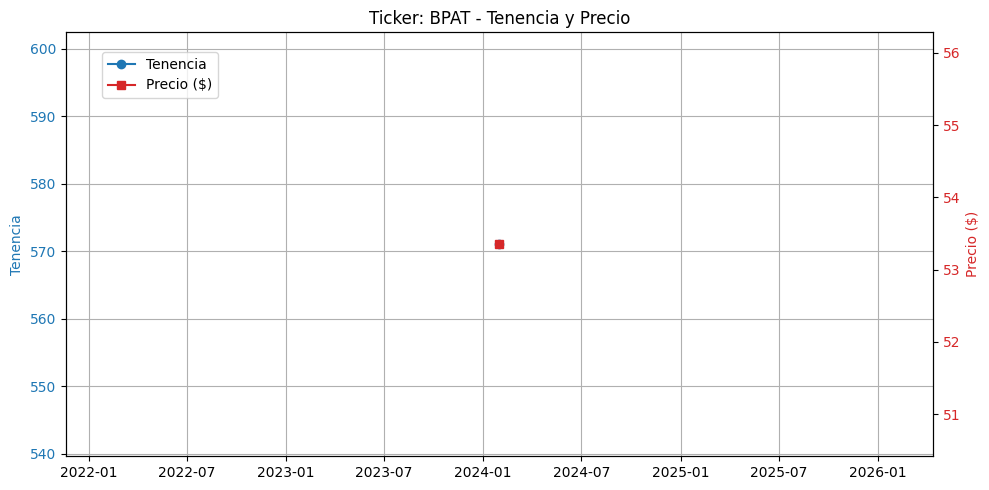

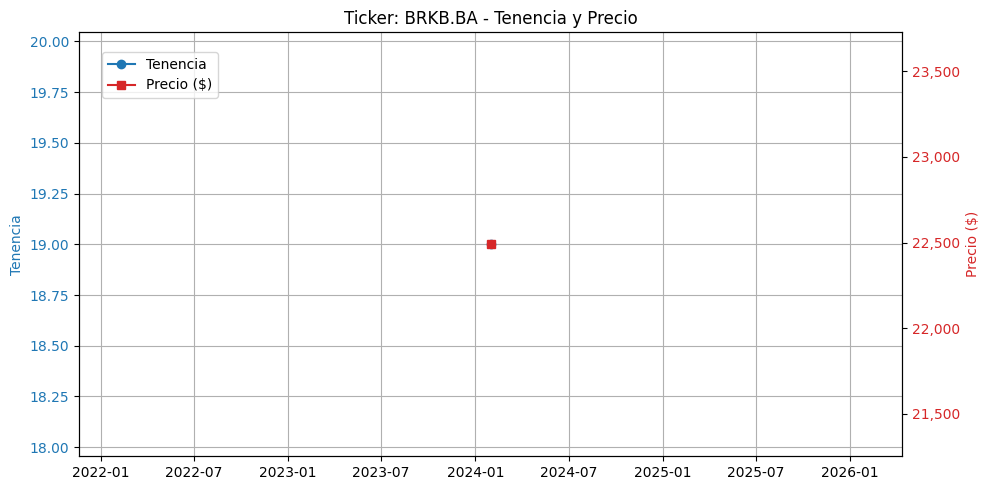

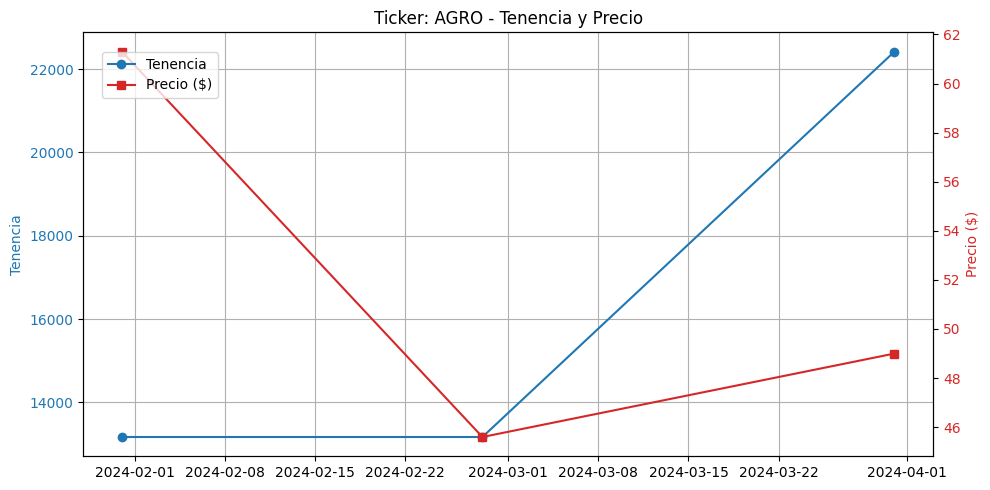

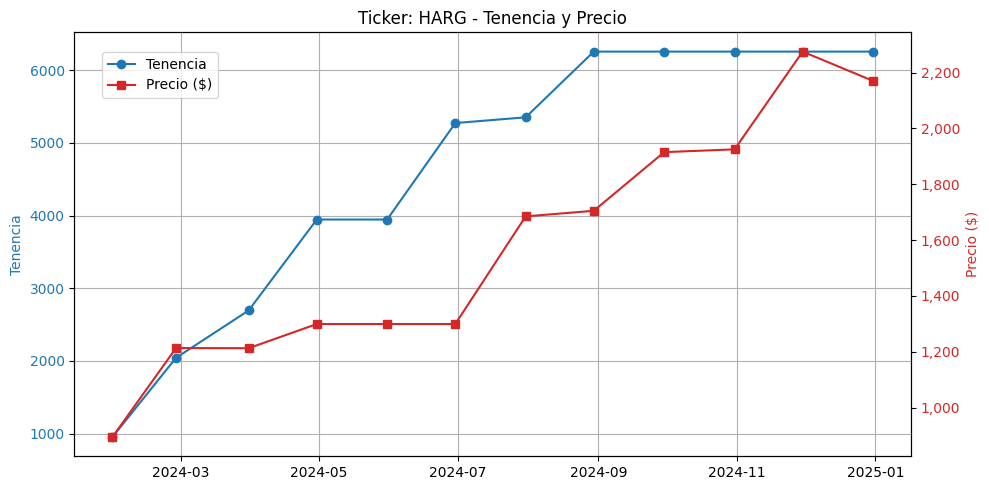

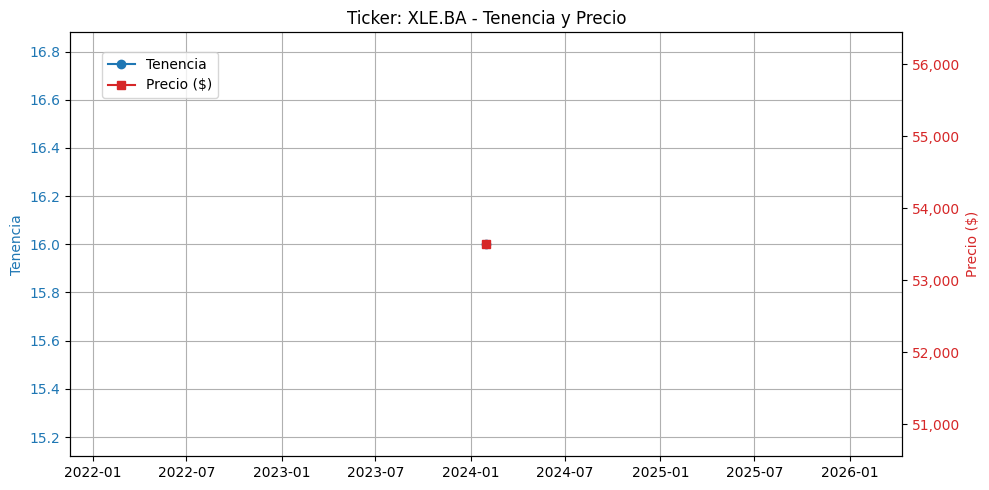

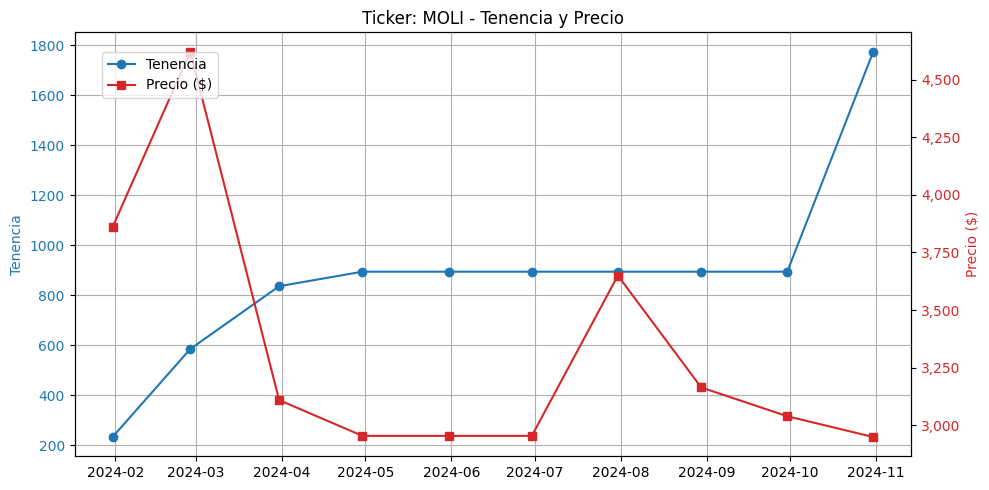

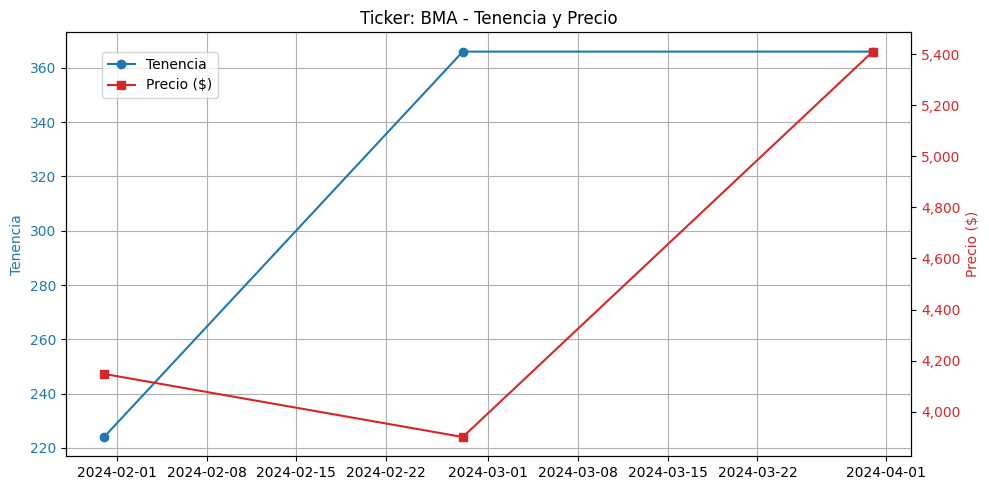

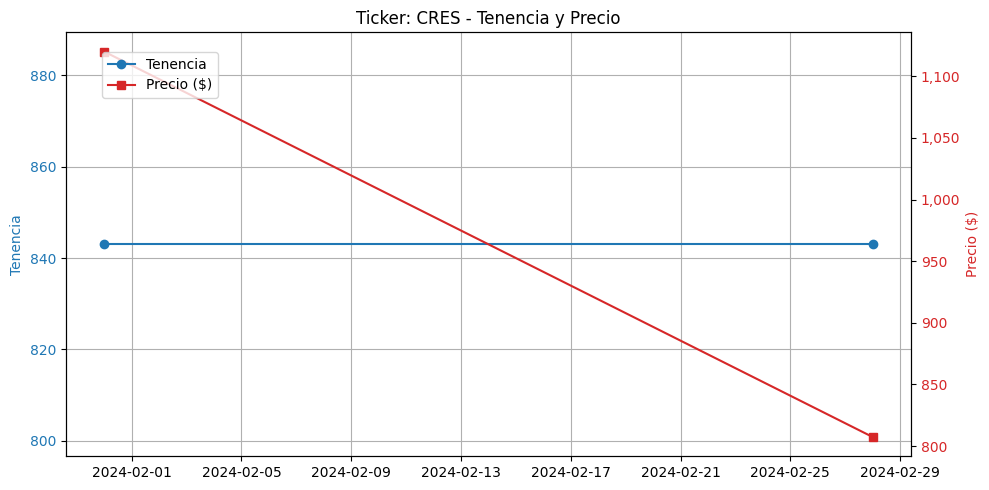

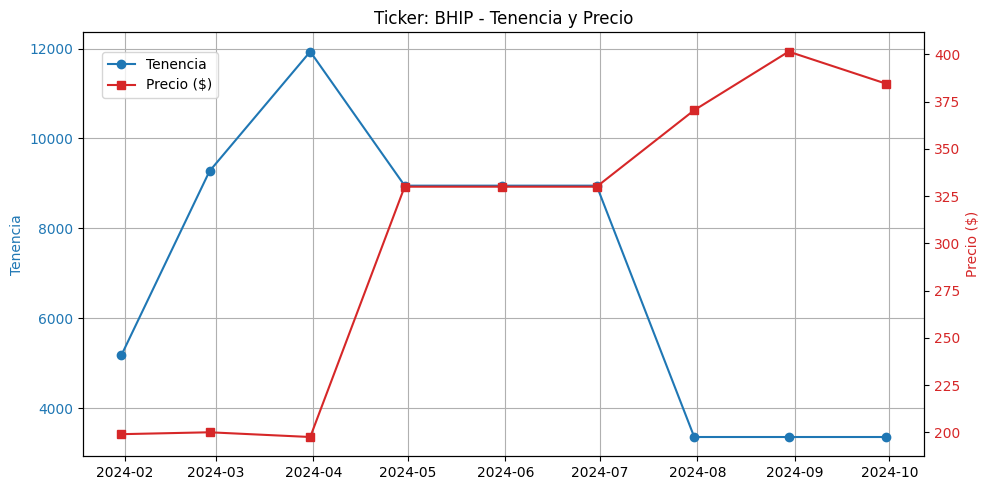

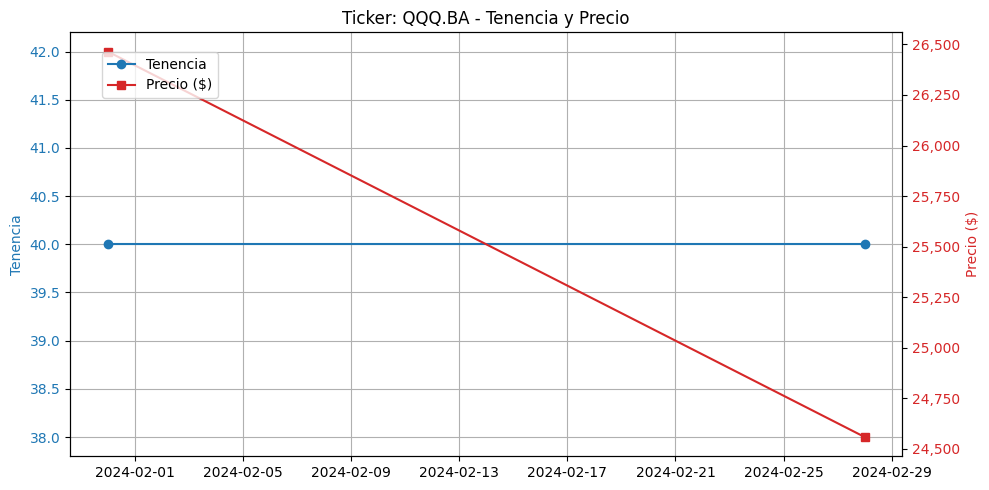

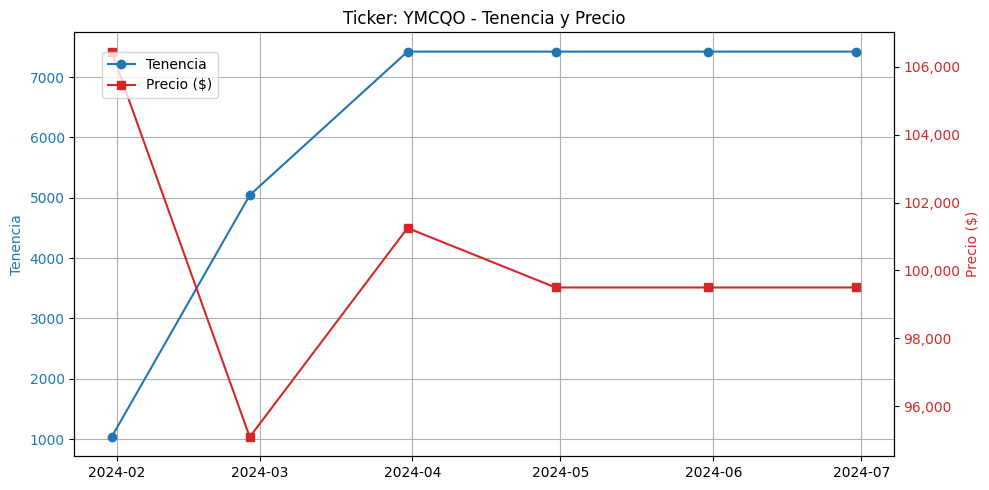

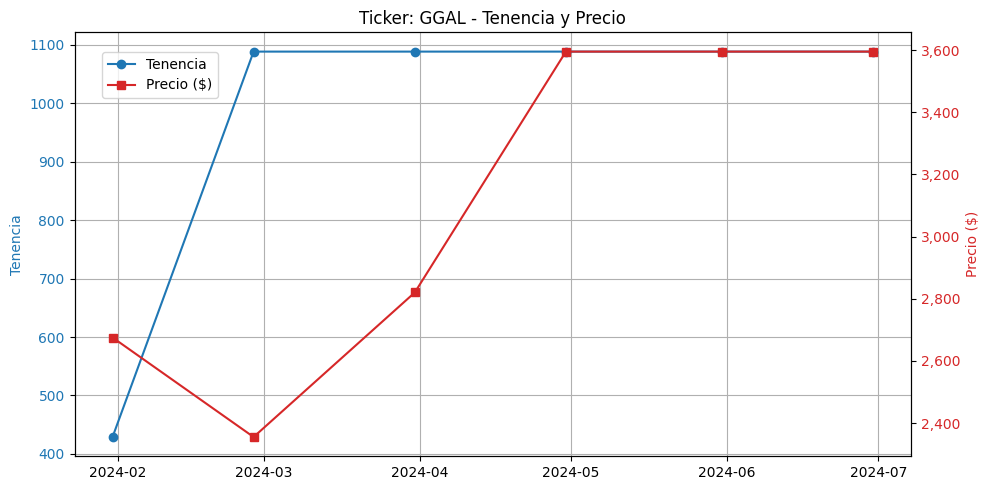

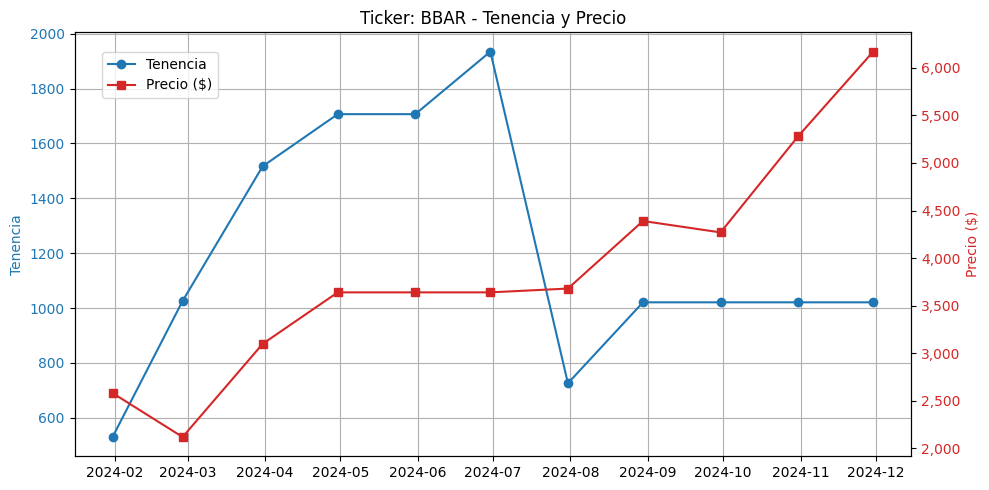

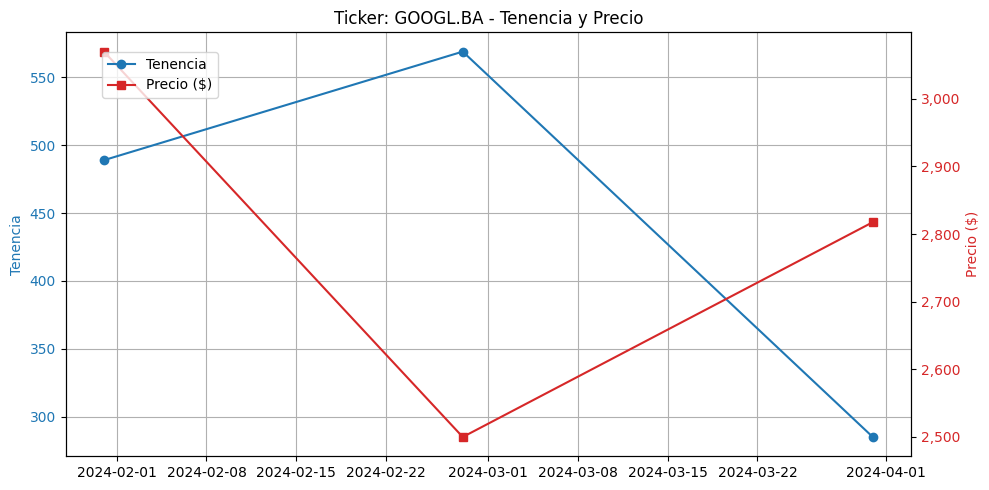

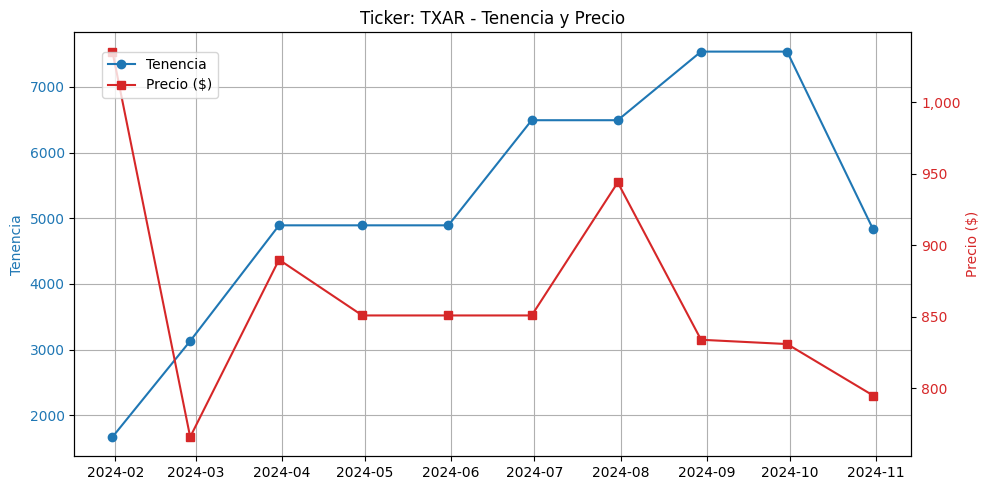

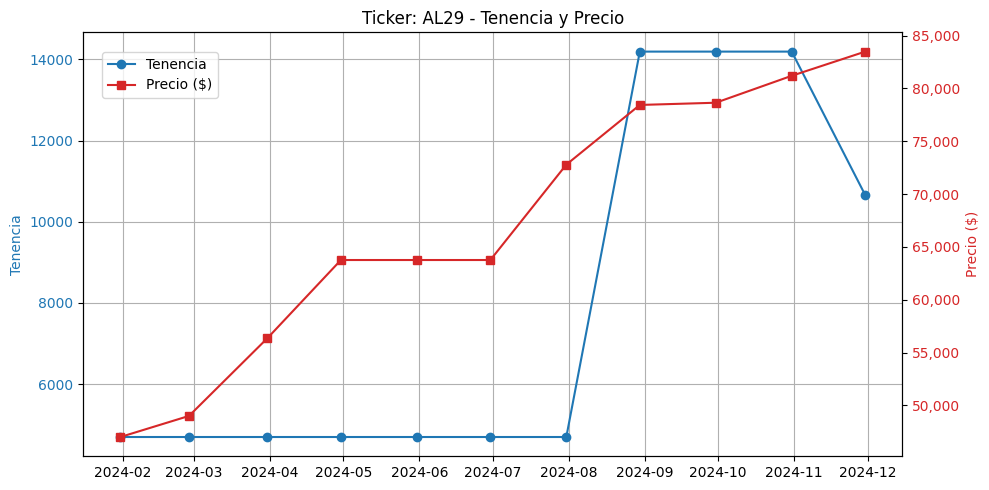

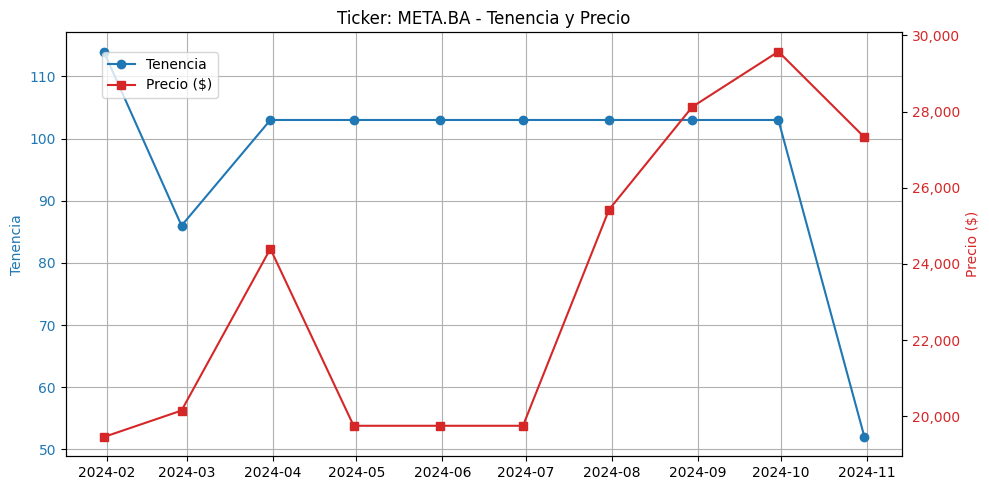

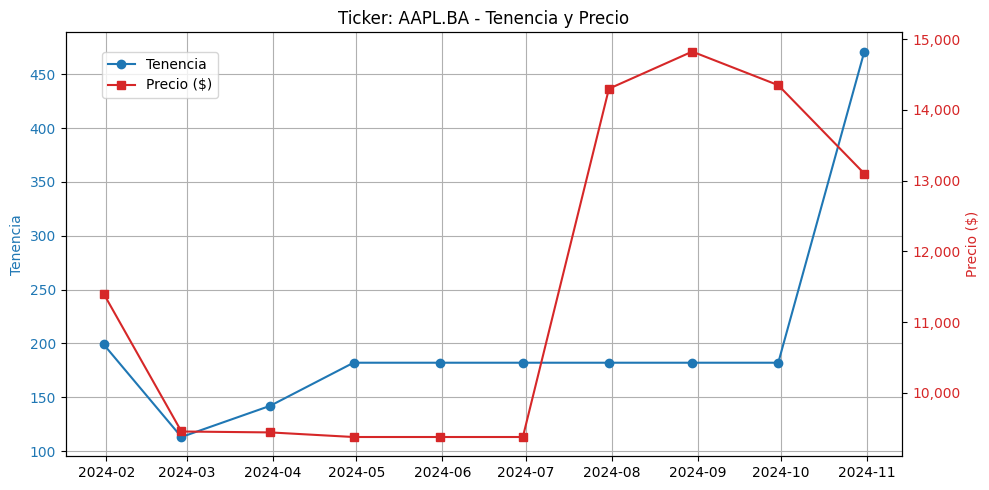

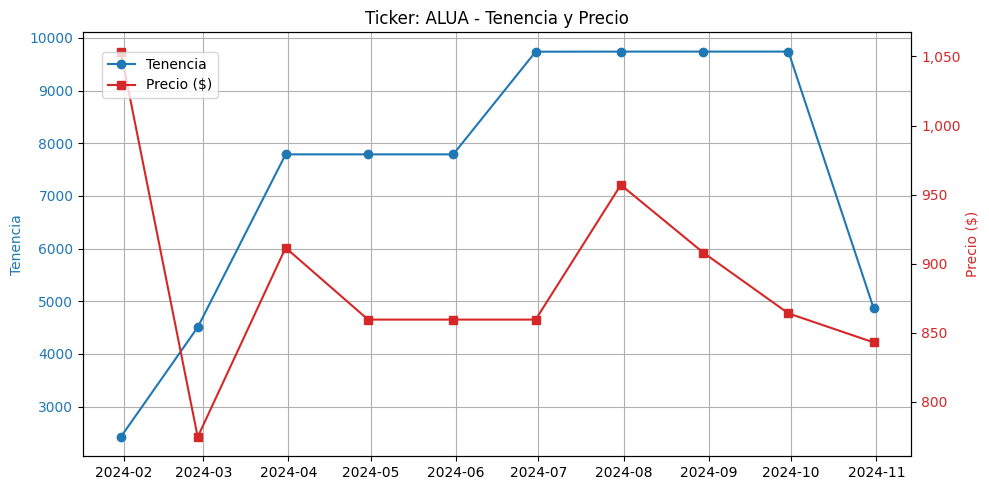

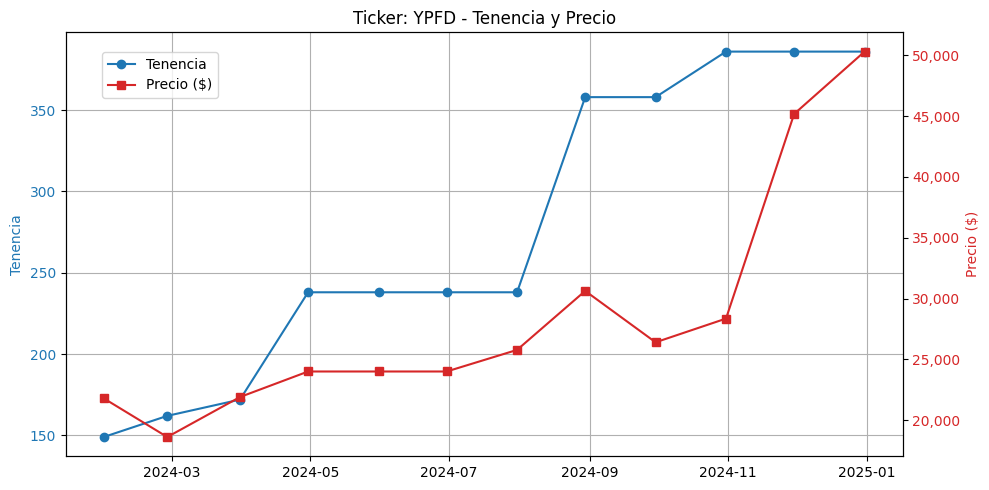

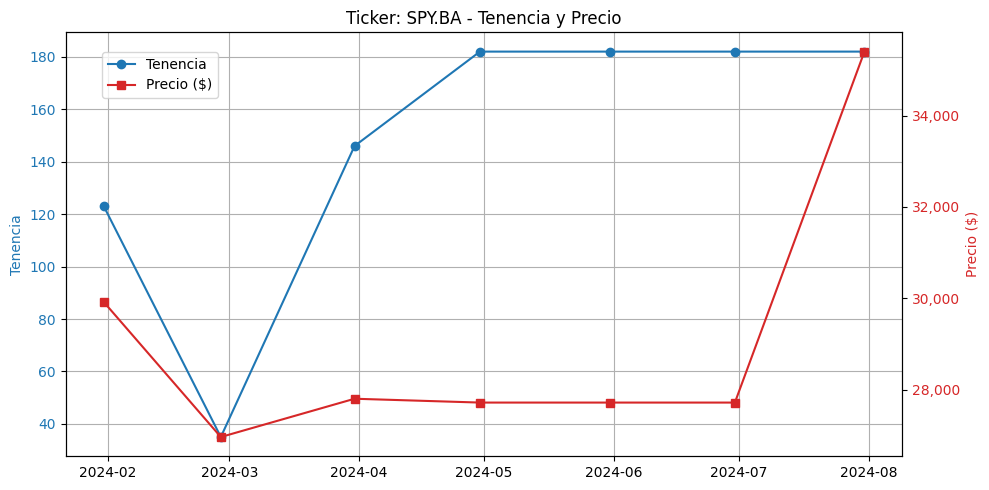

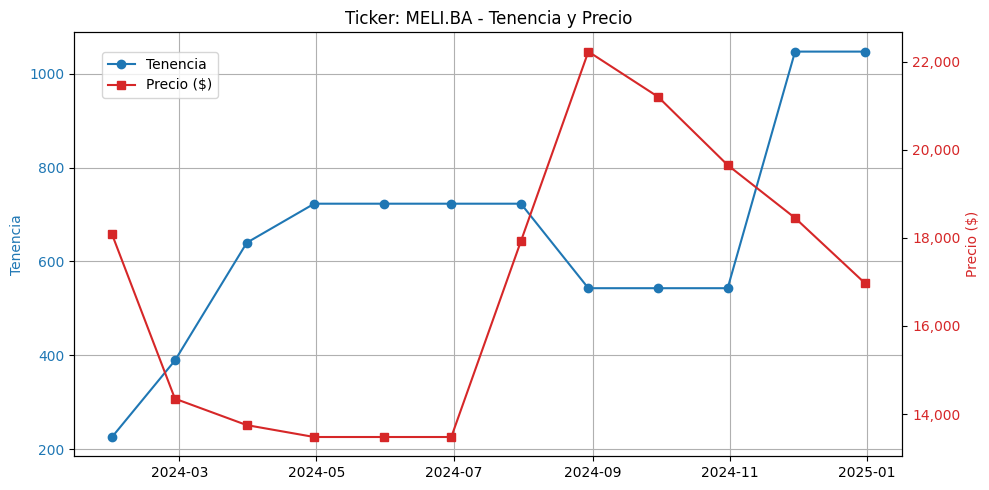

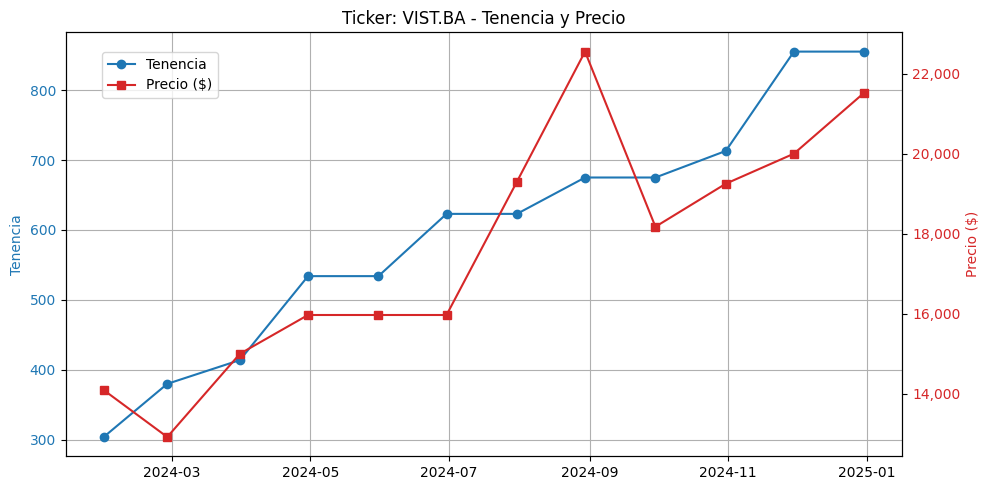

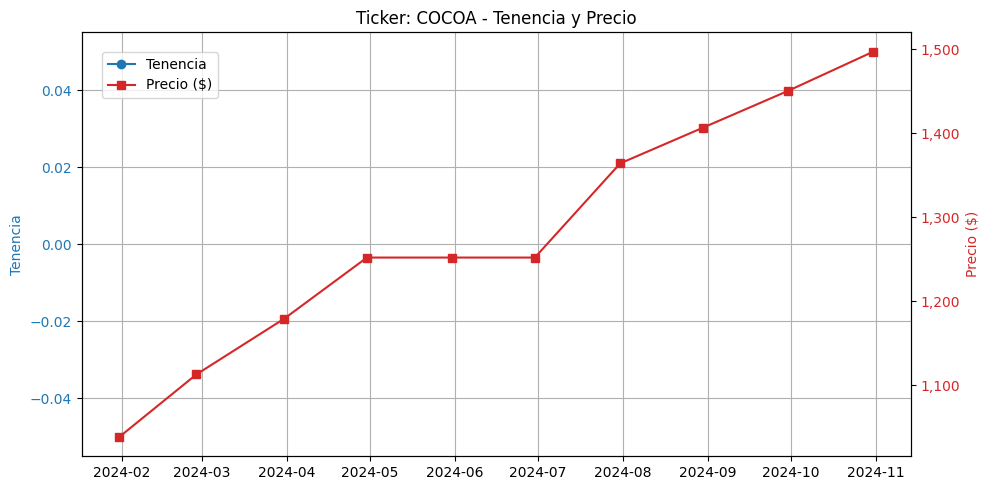

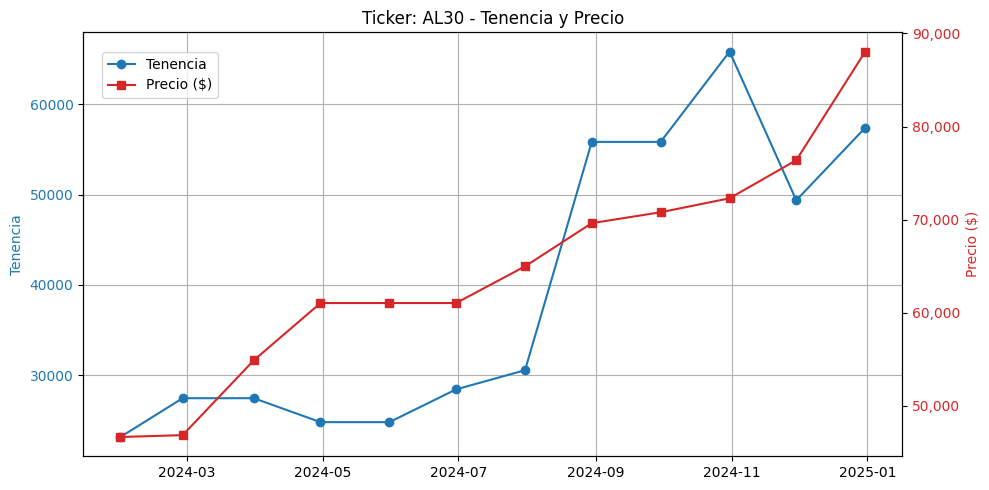

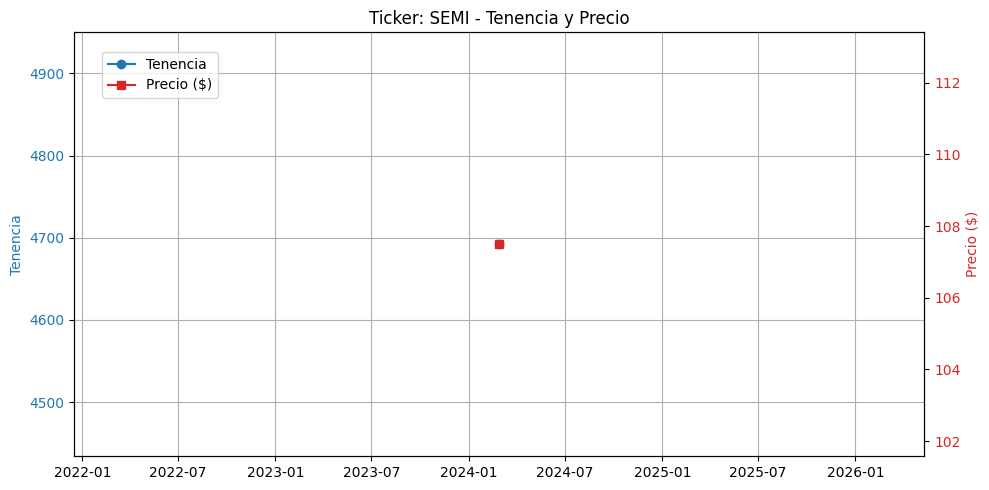

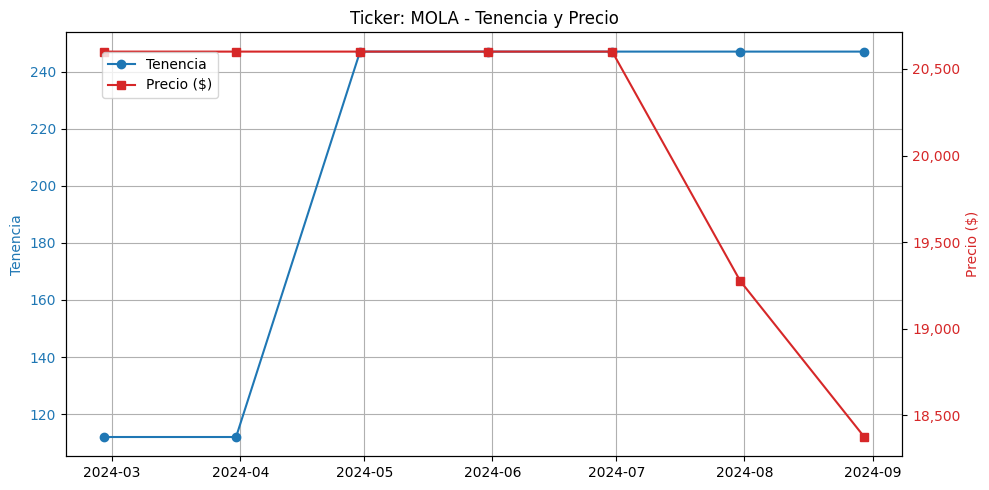

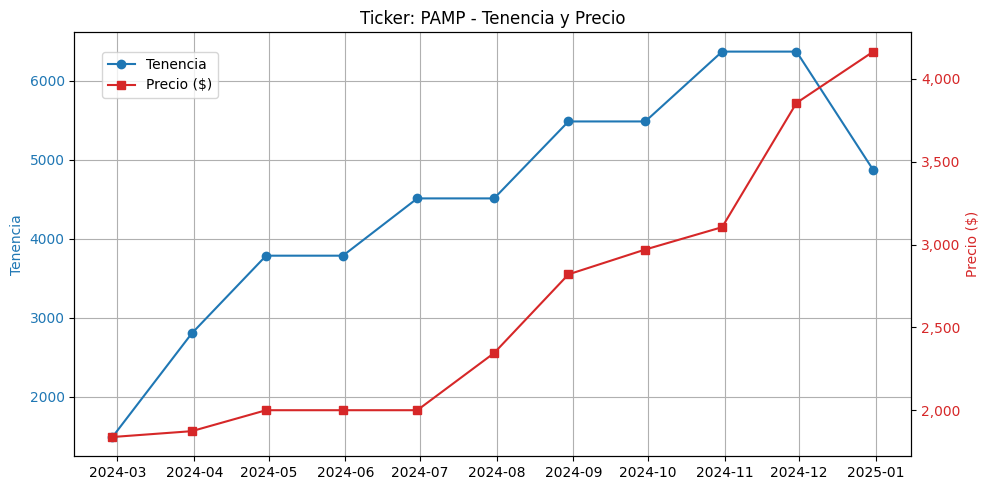

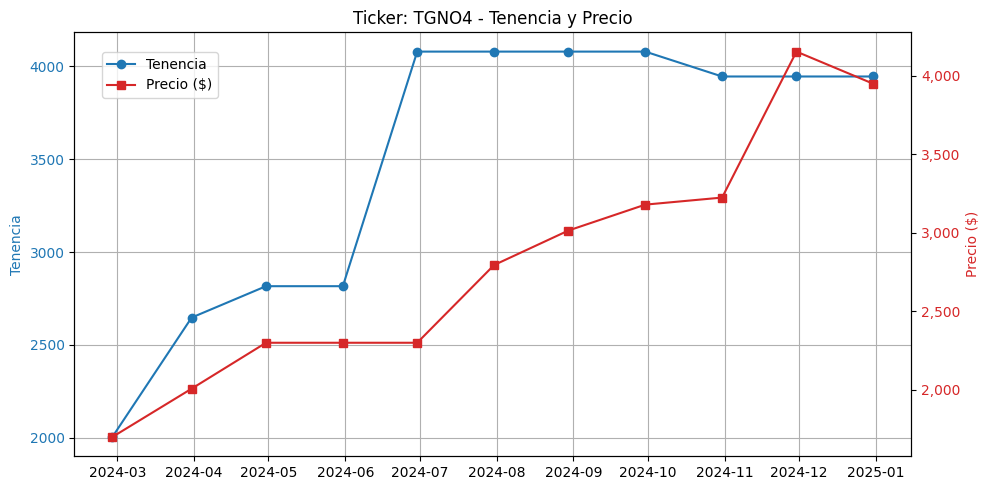

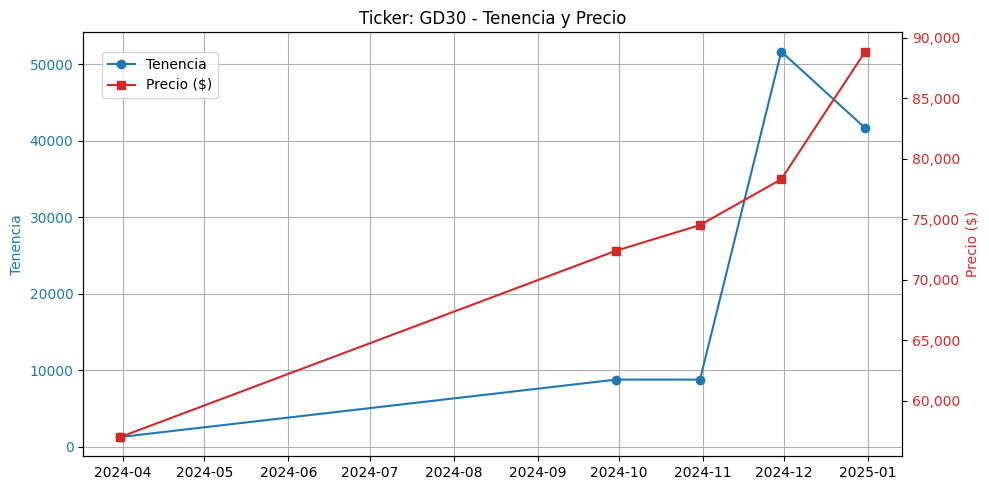

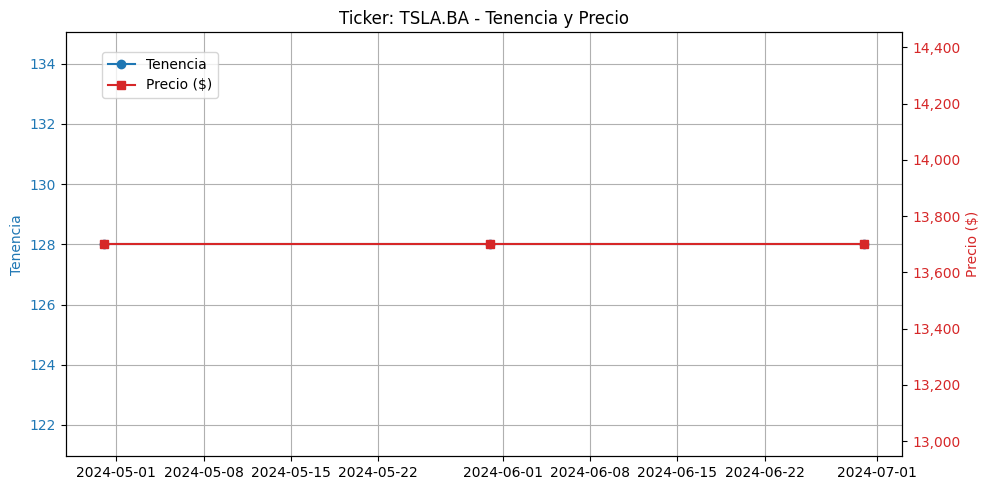

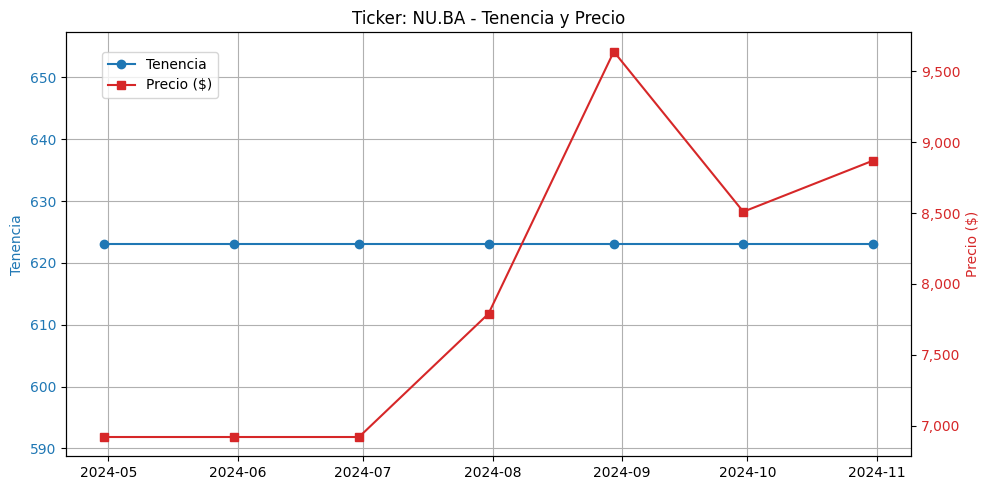

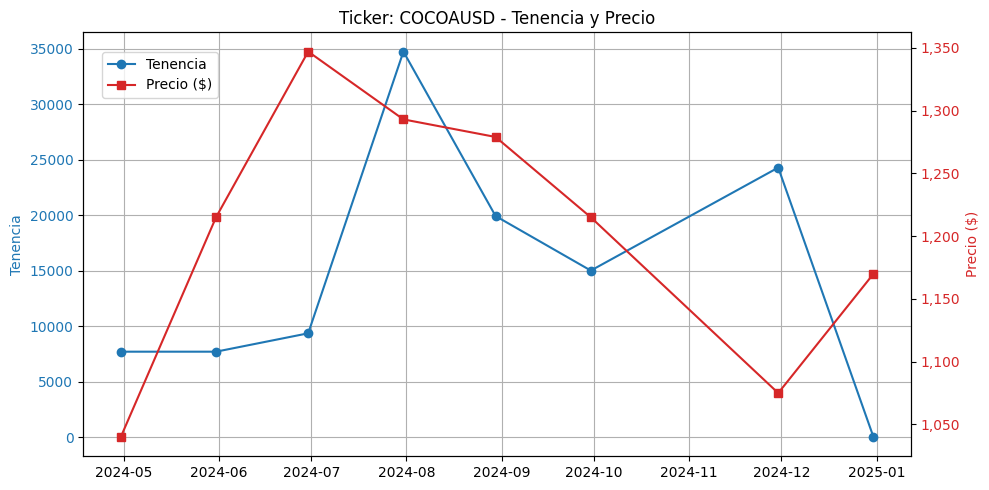

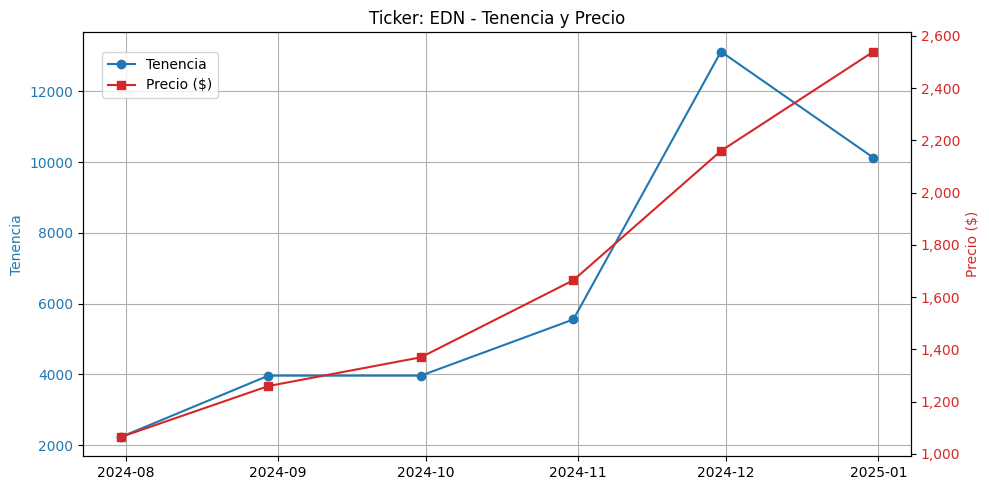

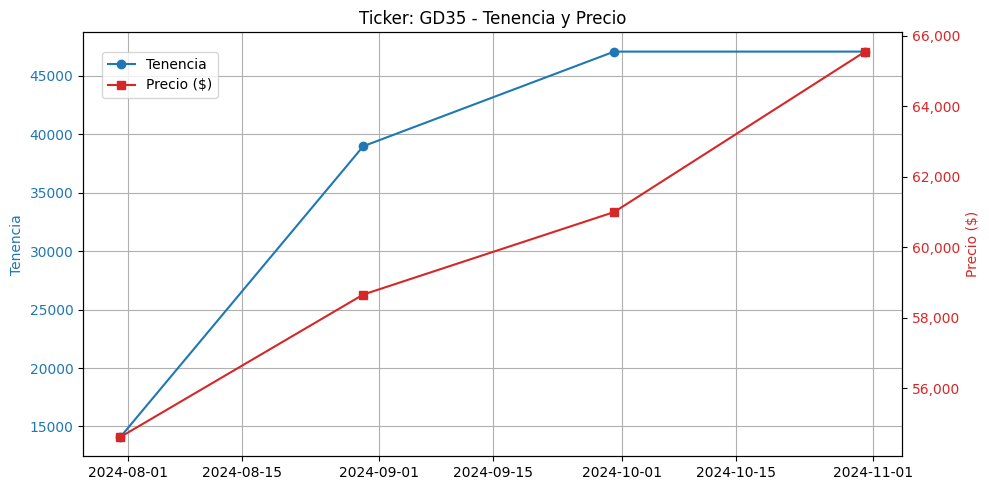

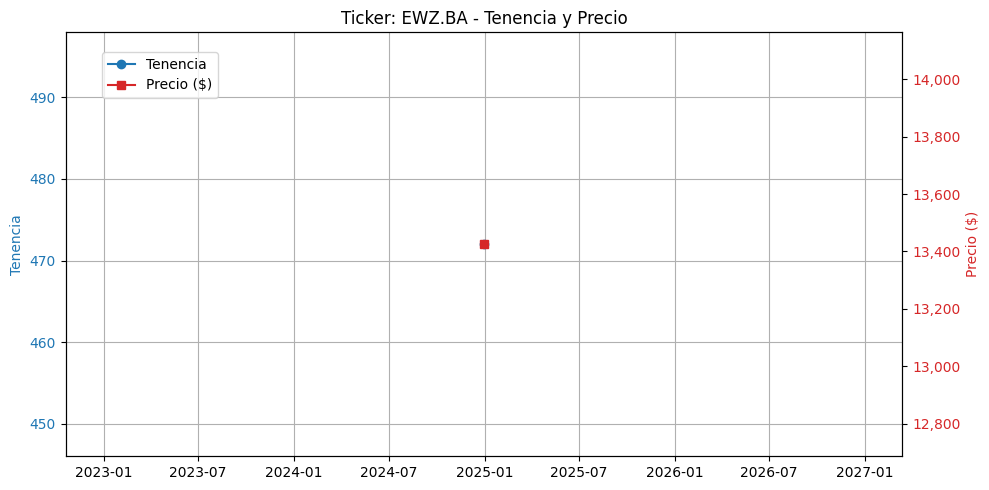

In [53]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

# Asegurar formato de fecha
df['fecha'] = pd.to_datetime(df['fecha'])

# Tickers únicos
tickers = df['Ticker'].dropna().unique()  # Evita errores con NaN

for ticker in tickers:
    df_ticker = df[df['Ticker'] == ticker].sort_values('fecha')

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Eje izquierdo: Tenencia
    ax1.plot(df_ticker['fecha'], df_ticker['Tenencia'], color='tab:blue', marker='o', label='Tenencia')
    ax1.set_ylabel('Tenencia', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.grid(True)

    # Eje derecho: Precio (columna 'precio')
    ax2 = ax1.twinx()
    ax2.plot(df_ticker['fecha'], df_ticker['precio'], color='tab:red', marker='s', linestyle='-', label='Precio ($)')
    ax2.set_ylabel('Precio ($)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

    # Título y leyenda
    plt.title(f"Ticker: {ticker} - Tenencia y Precio")
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
    plt.tight_layout()
    plt.show()
